## Imports

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import folium

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
# load the data
data_path = 'Datasets/2021-2023/CSB_2021-2023_All.csv'
initial_data = pd.read_csv(data_path)

/var/folders/n3/spvzfspj1gn51bldz75lhrt40000gn/T/ipykernel_71312/3892218257.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_data = pd.read_csv(data_path)


In [3]:
# copy data (it's faster to copy than to load it again)
bike_data = initial_data.copy()

## Check for missing and Null data

In [4]:
# check for null values
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  2
start_lng                  2
end_lat                13695
end_lng                13695
member_casual              0
dtype: int64

In [5]:
# check for missing values
bike_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  2
start_lng                  2
end_lat                13695
end_lng                13695
member_casual              0
dtype: int64

In [6]:
# It looks like there might be a problem with bike tracking, based on the missing start and end station info.
# There is significantly less data missing for the geodata (lat, lng) - maybe that can tell us where the bikes went

## Inspect the data

In [7]:
bike_data

ride_id  rideable_type           started_at  \
0        5CB9DFCECF79AF84   classic_bike  2021-01-01 00:08:33   
1        629E059504606547  electric_bike  2021-01-01 00:13:43   
2        E74069873161EE33  electric_bike  2021-01-01 00:14:32   
3        91F95E512CABC46A   classic_bike  2021-01-01 00:15:45   
4        DA46A05139C0EA2F   classic_bike  2021-01-01 00:17:46   
...                   ...            ...                  ...   
8180621  E802A8D89245438B  electric_bike  2023-06-30 23:57:43   
8180622  0448FEEB78F2B08D   classic_bike  2023-06-30 23:58:14   
8180623  5BE258BC59548BE9   classic_bike  2023-06-30 23:58:26   
8180624  5EAFC4B8F3E7680E  electric_bike  2023-06-30 23:59:01   
8180625  31813068FD8A3720   classic_bike  2023-06-30 23:59:35   

                    ended_at             start_station_name start_station_id  \
0        2021-01-01 00:33:53          Maine Ave & 9th St SW          31646.0   
1        2021-01-01 00:29:34                 10th & U St NW          31111.0   
2        2021-01-01 00:28:45          17th & Corcoran St NW          31214.0   
3        2021-01-01 00:21:20  Wilson Blvd. & N. Vermont St.          31926.0   
4        2021-01-01 00:21:00              11th & Park Rd NW          31651.0   
...                      ...                            ...              ...   
8180621  2023-07-01 00:07:16                            NaN              NaN   
8180622  2023-07-01 00:24:14    18th & New Hampshire Ave NW          31324.0   
8180623  2023-07-01 00:20:06    18th & New Hampshire Ave NW          31324.0   
8180624  2023-07-01 00:06:37    Adams Mill & Columbia Rd NW          31104.0   
8180625  2023-07-01 00:38:55       National Harbor Carousel          32423.0   

                                 end_station_name end_station_id  start_lat  \
0        Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                             NaN            NaN  38.917193   
2                            14th & Belmont St NW        31119.0  38.912138   
3                   Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                             14th & Newton St NW        31649.0  38.931322   
...                                           ...            ...        ...   
8180621                       14th & Newton St NW        31649.0  38.910000   
8180622      Massachusetts Ave & Dupont Circle NW        31200.0  38.911268   
8180623      Massachusetts Ave & Dupont Circle NW        31200.0  38.911268   
8180624                                       NaN            NaN  38.923005   
8180625                  National Harbor Carousel        32423.0  38.785900   

         start_lng    end_lat    end_lng member_casual  
0       -77.025236  38.894600 -77.072305        member  
1       -77.025894  38.960000 -77.020000        casual  
2       -77.038568  38.920870 -77.031691        member  
3       -77.114563  38.879477 -77.114563        member  
4       -77.028247  38.931991 -77.032956        member  
...            ...        ...        ...           ...  
8180621 -77.030000  38.931991 -77.032956        member  
8180622 -77.041829  38.910100 -77.044400        casual  
8180623 -77.041829  38.910100 -77.044400        casual  
8180624 -77.042420  38.930000 -77.030000        member  
8180625 -77.016700  38.785900 -77.016700        casual  

[8180626 rows x 13 columns]

In [8]:
# check data types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180626 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 811.4+ MB


In [9]:
bike_data.describe()

start_lat     start_lng       end_lat       end_lng
count  8.180624e+06  8.180624e+06  8.166931e+06  8.166931e+06
mean   3.890293e+01 -7.703172e+01  3.890184e+01 -7.703127e+01
std    2.656915e-02  3.286265e-02  5.567502e-02  1.025279e-01
min    3.877000e+01 -7.740000e+01  0.000000e+00 -7.756000e+01
25%    3.889050e+01 -7.704468e+01  3.889046e+01 -7.704468e+01
50%    3.890267e+01 -7.703174e+01  3.890206e+01 -7.703169e+01
75%    3.891369e+01 -7.701377e+01  3.891261e+01 -7.701350e+01
max    3.913000e+01 -7.682000e+01  3.918000e+01  0.000000e+00

In [10]:
# Because a lot of columns are of type object, we don't get much out of the data.
# Let's convert the column dtypes.

## Convert dtypes

In [11]:
# convert the object type columns to more useful data types

# convert categorical data
bike_data['rideable_type'] = pd.Categorical(bike_data['rideable_type'])
bike_data['member_casual'] = pd.Categorical(bike_data['member_casual'])

# convert datetime data
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'])
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'])

# droping the two rows with 'MTL-ECO5-03' as this is probably an error
bike_data = bike_data.drop(bike_data[bike_data['end_station_id'] == 'MTL-ECO5-03'].index)

# convert station id's to float
bike_data['end_station_id'] = pd.to_numeric(bike_data['end_station_id'], errors='coerce')
bike_data['start_station_id'] = pd.to_numeric(bike_data['start_station_id'], errors='coerce')

## Inspect the data again

In [12]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8180624 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      float64       
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(6), object(3)
memory usage: 764.6+ MB


In [13]:
bike_data.describe()

started_at                       ended_at  \
count                        8180624                        8180624   
mean   2022-05-21 15:41:19.305605376  2022-05-21 16:05:15.981119744   
min              2021-01-01 00:08:33            2021-01-01 00:21:00   
25%              2021-10-05 22:01:12  2021-10-05 22:24:05.750000128   
50%       2022-06-15 10:14:12.500000            2022-06-15 10:39:25   
75%    2022-12-11 21:21:40.750000128     2022-12-11 21:35:58.500000   
max              2023-06-30 23:59:35            2023-07-11 02:02:21   
std                              NaN                            NaN   

       start_station_id  end_station_id     start_lat     start_lng  \
count      7.711914e+06    7.659566e+06  8.180624e+06  8.180624e+06   
mean       3.136749e+04    3.136883e+04  3.890293e+01 -7.703172e+01   
min        3.020000e+04    3.020000e+04  3.877000e+01 -7.740000e+01   
25%        3.121200e+04    3.121400e+04  3.889050e+01 -7.704468e+01   
50%        3.127700e+04    3.127500e+04  3.890267e+01 -7.703174e+01   
75%        3.160500e+04    3.160800e+04  3.891369e+01 -7.701377e+01   
max        3.320000e+04    3.320000e+04  3.913000e+01 -7.682000e+01   
std        2.585772e+02    2.581412e+02  2.656915e-02  3.286265e-02   

            end_lat       end_lng  
count  8.166931e+06  8.166931e+06  
mean   3.890184e+01 -7.703127e+01  
min    0.000000e+00 -7.756000e+01  
25%    3.889046e+01 -7.704468e+01  
50%    3.890206e+01 -7.703169e+01  
75%    3.891261e+01 -7.701350e+01  
max    3.918000e+01  0.000000e+00  
std    5.567502e-02  1.025279e-01

In [14]:
bike_data

ride_id  rideable_type          started_at  \
0        5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33   
1        629E059504606547  electric_bike 2021-01-01 00:13:43   
2        E74069873161EE33  electric_bike 2021-01-01 00:14:32   
3        91F95E512CABC46A   classic_bike 2021-01-01 00:15:45   
4        DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46   
...                   ...            ...                 ...   
8180621  E802A8D89245438B  electric_bike 2023-06-30 23:57:43   
8180622  0448FEEB78F2B08D   classic_bike 2023-06-30 23:58:14   
8180623  5BE258BC59548BE9   classic_bike 2023-06-30 23:58:26   
8180624  5EAFC4B8F3E7680E  electric_bike 2023-06-30 23:59:01   
8180625  31813068FD8A3720   classic_bike 2023-06-30 23:59:35   

                   ended_at             start_station_name  start_station_id  \
0       2021-01-01 00:33:53          Maine Ave & 9th St SW           31646.0   
1       2021-01-01 00:29:34                 10th & U St NW           31111.0   
2       2021-01-01 00:28:45          17th & Corcoran St NW           31214.0   
3       2021-01-01 00:21:20  Wilson Blvd. & N. Vermont St.           31926.0   
4       2021-01-01 00:21:00              11th & Park Rd NW           31651.0   
...                     ...                            ...               ...   
8180621 2023-07-01 00:07:16                            NaN               NaN   
8180622 2023-07-01 00:24:14    18th & New Hampshire Ave NW           31324.0   
8180623 2023-07-01 00:20:06    18th & New Hampshire Ave NW           31324.0   
8180624 2023-07-01 00:06:37    Adams Mill & Columbia Rd NW           31104.0   
8180625 2023-07-01 00:38:55       National Harbor Carousel           32423.0   

                                 end_station_name  end_station_id  start_lat  \
0        Rosslyn Metro / Wilson Blvd & Ft Myer Dr         31015.0  38.880440   
1                                             NaN             NaN  38.917193   
2                            14th & Belmont St NW         31119.0  38.912138   
3                   Wilson Blvd. & N. Vermont St.         31926.0  38.879477   
4                             14th & Newton St NW         31649.0  38.931322   
...                                           ...             ...        ...   
8180621                       14th & Newton St NW         31649.0  38.910000   
8180622      Massachusetts Ave & Dupont Circle NW         31200.0  38.911268   
8180623      Massachusetts Ave & Dupont Circle NW         31200.0  38.911268   
8180624                                       NaN             NaN  38.923005   
8180625                  National Harbor Carousel         32423.0  38.785900   

         start_lng    end_lat    end_lng member_casual  
0       -77.025236  38.894600 -77.072305        member  
1       -77.025894  38.960000 -77.020000        casual  
2       -77.038568  38.920870 -77.031691        member  
3       -77.114563  38.879477 -77.114563        member  
4       -77.028247  38.931991 -77.032956        member  
...            ...        ...        ...           ...  
8180621 -77.030000  38.931991 -77.032956        member  
8180622 -77.041829  38.910100 -77.044400        casual  
8180623 -77.041829  38.910100 -77.044400        casual  
8180624 -77.042420  38.930000 -77.030000        member  
8180625 -77.016700  38.785900 -77.016700        casual  

[8180624 rows x 13 columns]

In [15]:
# check for missing values
bike_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  0
start_lng                  0
end_lat                13693
end_lng                13693
member_casual              0
dtype: int64

In [16]:
# Now we see more in the data, but still not a lot based on the describe function.
# Interesting is that the last ride ended 11 days after the last ride started.
# We fortunately got rid of the missing data in start_lat/lng by deleting 'MTL-ECO5-03'.

## Add ride duration for all rides

In [17]:
# add ride duration to the df
bike_data['ride_duration'] = bike_data['ended_at'] - bike_data['started_at']

In [18]:
# have a look at it sorted
bike_data.sort_values(by='ride_duration')

ride_id  rideable_type          started_at  \
4492925  FA9C958E87C641A2  electric_bike 2022-07-15 18:59:37   
2044514  6D4A9FAB1EA7CCF6  electric_bike 2021-10-05 20:15:37   
1735922  DA45A528F774B409  electric_bike 2021-09-06 14:39:43   
8060430  0B6B6FCD9724C536  electric_bike 2023-06-22 09:51:52   
8060432  D2E85A35D348A812  electric_bike 2023-06-22 09:52:16   
...                   ...            ...                 ...   
824374   3B27045AF560E0A2    docked_bike 2021-06-01 17:11:28   
871700   A9D8BB0E56656033    docked_bike 2021-06-06 18:49:47   
866928   D930715A5B6C8743    docked_bike 2021-06-06 11:31:30   
3984327  531EF72F12691194    docked_bike 2022-06-06 19:07:50   
578848   D89609AA669038B2    docked_bike 2021-05-02 12:25:01   

                   ended_at                  start_station_name  \
4492925 2022-07-15 16:55:50                                 NaN   
2044514 2021-10-05 18:47:30                                 NaN   
1735922 2021-09-06 13:16:58                                 NaN   
8060430 2023-06-22 08:29:43                                 NaN   
8060432 2023-06-22 08:53:15                                 NaN   
...                     ...                                 ...   
824374  2021-07-02 17:58:16                       8th & O St NW   
871700  2021-07-09 08:19:52                     23rd & E St NW    
866928  2021-07-10 10:51:17  Anacostia Roller Skating Pavillion   
3984327 2022-07-13 08:44:41               USDA / 12th & C St SW   
578848  2021-06-09 09:25:29                      17th & K St NW   

         start_station_id                       end_station_name  \
4492925               NaN            Columbia Rd & Belmont St NW   
2044514               NaN           7th & R St NW / Shaw Library   
1735922               NaN                          7th & T St NW   
8060430               NaN                          1st & M St NE   
8060432               NaN                          1st & M St NE   
...                   ...                                    ...   
824374            31281.0            Georgia Ave & Emerson St NW   
871700            31260.0         New Hampshire Ave & 24th St NW   
866928            31720.0     Anacostia Roller Skating Pavillion   
3984327           31217.0                         6035 Warehouse   
578848            31213.0  Ballston Metro / Stuart St & 9th St N   

         end_station_id  start_lat  start_lng    end_lat    end_lng  \
4492925         31113.0  38.920000 -77.040000  38.920669 -77.043680   
2044514         31245.0  38.910000 -77.020000  38.912747 -77.022599   
1735922         31109.0  38.920000 -77.020000  38.900472 -77.021922   
8060430         31603.0  38.910000 -77.010000  38.905697 -77.005483   
8060432         31603.0  38.910000 -77.010000  38.905697 -77.005483   
...                 ...        ...        ...        ...        ...   
824374          31405.0  38.908640 -77.022770  38.949662 -77.027333   
871700          31275.0  38.896104 -77.049882  38.901755 -77.051084   
866928          31720.0  38.878771 -76.970930  38.878771 -76.970930   
3984327         32901.0  38.886277 -77.028242  38.963810 -77.010266   
578848          31037.0  38.902760 -77.038630  38.881044 -77.111768   

        member_casual     ride_duration  
4492925        member -1 days +21:56:13  
2044514        member -1 days +22:31:53  
1735922        casual -1 days +22:37:15  
8060430        member -1 days +22:37:51  
8060432        casual -1 days +23:00:59  
...               ...               ...  
824374         casual  31 days 00:46:48  
871700         casual  32 days 13:30:05  
866928         casual  33 days 23:19:47  
3984327        casual  36 days 13:36:51  
578848         casual  37 days 21:00:28  

[8180624 rows x 14 columns]

In [19]:
# filter rows where 'ride_duration' is negative
negative_duration_filter = bike_data['ride_duration'] < pd.Timedelta(0)

# apply the filter
bike_data[negative_duration_filter]

ride_id  rideable_type          started_at  \
5089     C16EB43C187C2E86    docked_bike 2021-01-02 16:08:37   
24607    FE0660594EE7277E  electric_bike 2021-01-09 11:49:53   
41839    BB67CF987901204B  electric_bike 2021-01-13 19:52:48   
72357    FAE1E13B1CEBC836  electric_bike 2021-01-22 13:59:04   
87088    1CD1D158023FC600   classic_bike 2021-01-27 12:13:24   
...                   ...            ...                 ...   
8146256  8085DF716DB9CF50  electric_bike 2023-06-28 16:48:05   
8148713  A63419391E8B4B23  electric_bike 2023-06-28 18:09:35   
8148725  EBC8D397D8D256D2  electric_bike 2023-06-28 18:10:09   
8148807  B5C1535D0B775DEF  electric_bike 2023-06-28 18:13:43   
8175264  12E007F6579D1131  electric_bike 2023-06-30 16:35:21   

                   ended_at             start_station_name  start_station_id  \
5089    2021-01-02 16:08:31  15th St & Pennsylvania Ave NW           31129.0   
24607   2021-01-09 11:15:56                            NaN               NaN   
41839   2021-01-13 19:52:13                            NaN               NaN   
72357   2021-01-22 13:58:58      Jefferson Dr & 14th St SW           31247.0   
87088   2021-01-27 12:13:23                 14th & R St NW           31202.0   
...                     ...                            ...               ...   
8146256 2023-06-28 16:46:08                            NaN               NaN   
8148713 2023-06-28 18:09:32                            NaN               NaN   
8148725 2023-06-28 18:09:32                            NaN               NaN   
8148807 2023-06-28 18:09:32                            NaN               NaN   
8175264 2023-06-30 16:32:06                            NaN               NaN   

                  end_station_name  end_station_id  start_lat  start_lng  \
5089                 3rd & H St NW         31604.0  38.896464 -77.033380   
24607                3rd & G St SE         31625.0  38.880000 -77.000000   
41839                          NaN             NaN  38.930000 -77.060000   
72357    Jefferson Dr & 14th St SW         31247.0  38.888533 -77.032348   
87088               14th & R St NW         31202.0  38.913046 -77.032008   
...                            ...             ...        ...        ...   
8146256   New Jersey Ave & K St NW         31642.0  38.900000 -77.010000   
8148713         9th & Upshur St NW         31404.0  38.940000 -77.030000   
8148725             10th & U St NW         31111.0  38.920000 -77.030000   
8148807         9th & Upshur St NW         31404.0  38.940000 -77.030000   
8175264            3rd & Elm St NW         31118.0  38.920000 -77.020000   

           end_lat    end_lng member_casual     ride_duration  
5089     38.899408 -77.015289        casual -1 days +23:59:54  
24607    38.881208 -77.001803        member -1 days +23:26:03  
41839    38.930000 -77.060000        member -1 days +23:59:25  
72357    38.888533 -77.032348        casual -1 days +23:59:54  
87088    38.913046 -77.032008        member -1 days +23:59:59  
...            ...        ...           ...               ...  
8146256  38.902571 -77.013667        member -1 days +23:58:03  
8148713  38.941800 -77.025100        member -1 days +23:59:57  
8148725  38.917200 -77.025900        member -1 days +23:59:23  
8148807  38.941800 -77.025100        member -1 days +23:55:49  
8175264  38.917622 -77.015970        member -1 days +23:56:45  

[598 rows x 14 columns]

In [21]:
# filter rows where 'ride_duration' is longer than a day
long_duration_filter = bike_data['ride_duration'] > pd.Timedelta(days=1)

# apply the filter
bike_data[long_duration_filter].sort_values(by='ride_duration')

ride_id rideable_type          started_at  \
5839762  07E70E3D5BB1E273   docked_bike 2022-11-05 02:04:51   
5842719  45F6CF2B9A5CCA7A   docked_bike 2022-11-05 11:33:21   
5848007  A1556519EFECBC2F   docked_bike 2022-11-05 15:31:32   
4720380  CE1D743833F3FD03  classic_bike 2022-08-03 06:28:04   
5236964  9FE211BA401A342B  classic_bike 2022-09-14 13:48:26   
...                   ...           ...                 ...   
824374   3B27045AF560E0A2   docked_bike 2021-06-01 17:11:28   
871700   A9D8BB0E56656033   docked_bike 2021-06-06 18:49:47   
866928   D930715A5B6C8743   docked_bike 2021-06-06 11:31:30   
3984327  531EF72F12691194   docked_bike 2022-06-06 19:07:50   
578848   D89609AA669038B2   docked_bike 2021-05-02 12:25:01   

                   ended_at                    start_station_name  \
5839762 2022-11-06 02:04:53  Duke St & Strand (Robinson Terminal)   
5842719 2022-11-06 11:33:23                        18th & R St NW   
5848007 2022-11-06 15:31:34                    Half & Water St SW   
4720380 2022-08-04 06:28:12    2nd & V St SW / James Creek Marina   
5236964 2022-09-15 13:48:35         7th St & Massachusetts Ave NE   
...                     ...                                   ...   
824374  2021-07-02 17:58:16                         8th & O St NW   
871700  2021-07-09 08:19:52                       23rd & E St NW    
866928  2021-07-10 10:51:17    Anacostia Roller Skating Pavillion   
3984327 2022-07-13 08:44:41                 USDA / 12th & C St SW   
578848  2021-06-09 09:25:29                        17th & K St NW   

         start_station_id                       end_station_name  \
5839762           31933.0                                    NaN   
5842719           31278.0                                    NaN   
5848007           31664.0                                    NaN   
4720380           31667.0              13th St & New York Ave NW   
5236964           31647.0                          2nd & G St NE   
...                   ...                                    ...   
824374            31281.0            Georgia Ave & Emerson St NW   
871700            31260.0         New Hampshire Ave & 24th St NW   
866928            31720.0     Anacostia Roller Skating Pavillion   
3984327           31217.0                         6035 Warehouse   
578848            31213.0  Ballston Metro / Stuart St & 9th St N   

         end_station_id  start_lat  start_lng    end_lat    end_lng  \
5839762             NaN  38.801947 -77.040293        NaN        NaN   
5842719             NaN  38.912648 -77.041834        NaN        NaN   
5848007             NaN  38.866277 -77.010551        NaN        NaN   
4720380         31227.0  38.863743 -77.013814  38.900283 -77.029822   
5236964         31639.0  38.892220 -76.996020  38.899670 -77.003666   
...                 ...        ...        ...        ...        ...   
824374          31405.0  38.908640 -77.022770  38.949662 -77.027333   
871700          31275.0  38.896104 -77.049882  38.901755 -77.051084   
866928          31720.0  38.878771 -76.970930  38.878771 -76.970930   
3984327         32901.0  38.886277 -77.028242  38.963810 -77.010266   
578848          31037.0  38.902760 -77.038630  38.881044 -77.111768   

        member_casual    ride_duration  
5839762        casual  1 days 00:00:02  
5842719        casual  1 days 00:00:02  
5848007        casual  1 days 00:00:02  
4720380        casual  1 days 00:00:08  
5236964        casual  1 days 00:00:09  
...               ...              ...  
824374         casual 31 days 00:46:48  
871700         casual 32 days 13:30:05  
866928         casual 33 days 23:19:47  
3984327        casual 36 days 13:36:51  
578848         casual 37 days 21:00:28  

[11974 rows x 14 columns]

## Investigate the station data

In [22]:
# how many start station names do we have?
start_station_name_count = len(bike_data['start_station_name'].value_counts())
print(f'start_station_name count: {start_station_name_count}')

# how many start station IDs do we have?
start_station_id_count = len(bike_data['start_station_id'].value_counts())
print(f'start_station_id count: {start_station_id_count}')

print(f'difference: {start_station_name_count - start_station_id_count}')

print()

# how many end station names do we have?
end_station_name_count = len(bike_data['end_station_name'].value_counts())
print(f'end_station_name count: {end_station_name_count}')

# how many end station IDs do we have?
end_station_id_count = len(bike_data['end_station_id'].value_counts())
print(f'end_station_id count: {end_station_id_count}')

print(f'difference: {end_station_name_count - end_station_id_count}')


start_station_name count: 815
start_station_id count: 745
difference: 70

end_station_name count: 818
end_station_id count: 748
difference: 70


In [23]:
# There is 3 more end stations than start stations
# There is 70 more names than ID's
# How many stations do we actually have?
# why are the station names inconsistent?

In [24]:
# make a df with all the unique combinations of start_station_name and start_station_id.
start_stations = bike_data[['start_station_name', 'start_station_id']].drop_duplicates(ignore_index=True)
start_stations

start_station_name  start_station_id
0              Maine Ave & 9th St SW           31646.0
1                     10th & U St NW           31111.0
2              17th & Corcoran St NW           31214.0
3      Wilson Blvd. & N. Vermont St.           31926.0
4                  11th & Park Rd NW           31651.0
..                               ...               ...
813          Emma Lee St & Morris St           32266.0
814             Route 29 & Bisvey Dr           32267.0
815      Jones Branch Dr & Blyton St           32269.0
816        Arlington Blvd & Allen St           32268.0
817  Westbranch Dr & Jones Branch Dr           32270.0

[818 rows x 2 columns]

In [25]:
# show the rows with duplicated IDs
start_stations_duplicated_ids = start_stations[start_stations.duplicated(subset='start_station_id', keep=False)].sort_values(by=['start_station_id'])
start_stations_duplicated_ids

start_station_name  start_station_id
389                          Army Navy Dr & S Joyce St           31006.0
759       Pentagon Row Plaza / Army Navy Dr & Joyce St           31006.0
755                             19th St N & Ft Myer Dr           31014.0
152                            Lynn St & 19th St North           31014.0
245           Rosslyn Metro / Wilson Blvd & Ft Myer Dr           31015.0
..                                                 ...               ...
756                  Founders Row/W Broad St & West St           32600.0
362  George Mason High School / Haycock Rd & Leesbu...           32600.0
660  Meridian High School / Haycock Rd & Leesburg Pike           32600.0
720                                        Eden Center           32601.0
546          State Theatre / Park Pl & N Washington St           32601.0

[141 rows x 2 columns]

In [26]:
# Did they change the name at a given point in time?
# Let's check it by comparing the earliest and latest rides for the single names.

In [27]:
# get minimum start times
min_start_times = bike_data.groupby('start_station_name')['started_at'].min().reset_index()

# get maximum start times
max_start_times = bike_data.groupby('start_station_name')['started_at'].max().reset_index()

# get minimum end times
min_end_times = bike_data.groupby('start_station_name')['ended_at'].min().reset_index()

# get maximum end times
max_end_times = bike_data.groupby('start_station_name')['ended_at'].max().reset_index()

In [28]:
# merge start_stations_duplicated_ids with min_start_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, min_start_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'started_at': 'min_started_at'})

# merge start_stations_duplicated_ids with max_start_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, max_start_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'started_at': 'max_started_at'})

# merge start_stations_duplicated_ids with min_end_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, min_end_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'ended_at': 'min_ended_at'})

# merge start_stations_duplicated_ids with max_end_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, max_end_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'ended_at': 'max_ended_at'})

start_stations_duplicated_ids

start_station_name  start_station_id  \
0                            Army Navy Dr & S Joyce St           31006.0   
1         Pentagon Row Plaza / Army Navy Dr & Joyce St           31006.0   
2                               19th St N & Ft Myer Dr           31014.0   
3                              Lynn St & 19th St North           31014.0   
4             Rosslyn Metro / Wilson Blvd & Ft Myer Dr           31015.0   
..                                                 ...               ...   
136                  Founders Row/W Broad St & West St           32600.0   
137  George Mason High School / Haycock Rd & Leesbu...           32600.0   
138  Meridian High School / Haycock Rd & Leesburg Pike           32600.0   
139                                        Eden Center           32601.0   
140          State Theatre / Park Pl & N Washington St           32601.0   

         min_started_at      max_started_at        min_ended_at  \
0   2021-01-02 11:47:22 2022-12-09 15:06:24 2021-01-02 12:15:11   
1   2022-12-09 16:53:44 2023-06-30 23:28:11 2022-12-09 17:11:14   
2   2022-11-15 19:46:20 2023-06-30 20:56:17 2022-11-15 20:04:29   
3   2021-01-01 09:37:56 2022-11-18 08:18:12 2021-01-01 09:55:35   
4   2021-01-01 14:33:57 2021-08-11 16:35:41 2021-01-01 14:52:06   
..                  ...                 ...                 ...   
136 2022-12-02 16:27:58 2023-06-30 13:40:57 2022-12-02 16:46:26   
137 2021-01-02 11:03:01 2021-07-22 18:22:21 2021-01-02 14:50:46   
138 2021-07-27 15:45:59 2022-12-01 06:16:33 2021-07-27 15:52:29   
139 2022-06-15 17:52:57 2023-06-30 14:17:12 2022-06-15 17:59:48   
140 2021-01-05 12:17:52 2022-06-13 14:30:33 2021-01-05 12:41:48   

           max_ended_at  
0   2022-12-09 15:26:17  
1   2023-06-30 23:30:27  
2   2023-06-30 21:02:50  
3   2022-11-18 08:27:08  
4   2021-08-11 17:02:38  
..                  ...  
136 2023-06-30 13:46:47  
137 2021-07-22 18:30:14  
138 2022-12-01 06:20:54  
139 2023-06-30 14:21:27  
140 2022-06-13 14:59:22  

[141 rows x 6 columns]

In [29]:
# see if the duplicates are always 2 or more?
start_stations_duplicated_ids['start_station_id'].value_counts()

start_station_id
32600.0    3
31094.0    3
31923.0    3
31006.0    2
31908.0    2
          ..
31261.0    2
31293.0    2
31305.0    2
31331.0    2
32601.0    2
Name: count, Length: 69, dtype: int64

In [30]:
# 3 of the ID's have 3 names.

In [31]:
# have a look at the date in one example
start_stations_duplicated_ids[start_stations_duplicated_ids['start_station_id'] == 31974.0]

start_station_name  start_station_id      min_started_at  \
116    Fairfax Dr & N Taylor St           31974.0 2022-07-26 16:59:34   
117  Mandeville Ln & Stovall St           31974.0 2022-09-08 16:53:49   

         max_started_at        min_ended_at        max_ended_at  
116 2023-06-30 16:18:24 2022-07-26 17:01:08 2023-06-30 16:23:05  
117 2023-06-30 16:11:07 2022-09-08 17:11:22 2023-06-30 16:28:05

In [32]:
# show one example on the map
m=folium.Map(location=[38.90, -77.06], zoom_start=12)

# Add markers to the map from the DataFrame
for index, row in bike_data[(bike_data['start_station_id'] == 31974.0)].iterrows():
    folium.Marker([row['start_lat'], row['start_lng']],
                  popup=row['start_station_name']).add_to(m)

m

In [33]:
# show time difference between the different name for the station ID.

# group by 'start_station_id' and calculate the desired subtraction
result = (
    start_stations_duplicated_ids.groupby('start_station_id')
    .agg(min_started_at_max=('min_started_at', 'max'), max_started_at_min=('max_started_at', 'min'))
)

# perform the subtraction directly
result['difference'] = result['min_started_at_max'] - result['max_started_at_min']

#result.sort_values(by=['difference']).to_csv('name_change_time.csv')

print(result.sort_values(by=['difference']))

                  min_started_at_max  max_started_at_min          difference
start_station_id                                                            
31103.0          2021-03-14 14:19:18 2022-01-18 18:03:20 -311 days +20:15:58
31974.0          2022-09-08 16:53:49 2023-06-30 16:11:07 -295 days +00:42:42
31720.0          2022-08-06 17:06:53 2022-09-02 10:57:07  -27 days +06:09:46
31293.0          2021-04-02 16:15:43 2021-04-12 18:29:24  -11 days +21:46:19
31627.0          2023-05-07 14:27:25 2023-05-11 08:51:35   -4 days +05:35:50
...                              ...                 ...                 ...
32243.0          2022-11-01 16:29:00 2022-10-23 14:34:34     9 days 01:54:26
32211.0          2023-01-31 08:18:29 2023-01-16 10:23:04    14 days 21:55:25
31094.0          2022-09-21 09:25:26 2021-07-18 18:05:18   429 days 15:20:08
31923.0          2022-12-09 16:36:14 2021-08-12 19:36:02   483 days 21:00:12
32600.0          2022-12-02 16:27:58 2021-07-22 18:22:21   497 days 22:05:37

In [34]:
# For the last 3 entries the values are very high, becuse they actually changed the name multiple times during the year.
# 31103.0 - here two names existed simulatniously for the same place for arround 300 days; '15th & Harvard St NW'  is correct; '16th & Harvard St NW' should be 31135.0
# 31974.0 - 'Fairfax Dr & N Taylor St'  is incorrect it should have id = 31049.0
# 31720.0 - was a typo that got fixed

In [35]:
# check only one ID
start_stations_duplicated_ids[start_stations_duplicated_ids['start_station_id'] == 31974.0]

start_station_name  start_station_id      min_started_at  \
116    Fairfax Dr & N Taylor St           31974.0 2022-07-26 16:59:34   
117  Mandeville Ln & Stovall St           31974.0 2022-09-08 16:53:49   

         max_started_at        min_ended_at        max_ended_at  
116 2023-06-30 16:18:24 2022-07-26 17:01:08 2023-06-30 16:23:05  
117 2023-06-30 16:11:07 2022-09-08 17:11:22 2023-06-30 16:28:05

In [36]:
# see how many rides there is for each name of a given ID
bike_data[bike_data['start_station_id'] == 31974.0 ]['start_station_name'].value_counts()

start_station_name
Mandeville Ln & Stovall St    646
Fairfax Dr & N Taylor St       19
Name: count, dtype: int64

In [37]:
# check if the name has a different ID as well
bike_data[bike_data['start_station_name'].str.contains('Fairfax Dr & N Taylor St', case=False, na=False)]['start_station_id'].value_counts()

start_station_id
31049.0    1869
31974.0      19
Name: count, dtype: int64

In [38]:
# show the rows with duplicated names
start_stations[start_stations.duplicated(subset='start_station_name', keep=False)].sort_values(by=['start_station_name'])

# This confirms some of the bugs found above.

start_station_name  start_station_id
101      16th & Harvard St NW           31103.0
707      16th & Harvard St NW           31135.0
723  Fairfax Dr & N Taylor St           31974.0
724  Fairfax Dr & N Taylor St           31049.0

## Investigate bikes with missing start and/or end station

In [39]:
# investigate the missing values for start station
bike_data[bike_data['start_station_id'].isna()]

ride_id  rideable_type          started_at  \
5        0FD3B4B2152425C3  electric_bike 2021-01-01 00:18:16   
20       997E8E08C493F034  electric_bike 2021-01-01 00:27:18   
22       87E06BFC439643DA  electric_bike 2021-01-01 00:32:44   
24       6E4F247C2E3358BA  electric_bike 2021-01-01 00:35:51   
37       60807578738CDEB8  electric_bike 2021-01-01 00:50:13   
...                   ...            ...                 ...   
8180602  EB82BDB804277B1E  electric_bike 2023-06-30 23:54:09   
8180609  7892BA16C781301C  electric_bike 2023-06-30 23:55:25   
8180614  C215A43FB51B4F54  electric_bike 2023-06-30 23:55:44   
8180620  BA67AE126D50EE25  electric_bike 2023-06-30 23:57:29   
8180621  E802A8D89245438B  electric_bike 2023-06-30 23:57:43   

                   ended_at start_station_name  start_station_id  \
5       2021-01-01 00:29:05                NaN               NaN   
20      2021-01-01 00:34:30                NaN               NaN   
22      2021-01-01 00:32:51                NaN               NaN   
24      2021-01-01 00:37:57                NaN               NaN   
37      2021-01-01 00:57:14                NaN               NaN   
...                     ...                ...               ...   
8180602 2023-07-01 00:01:59                NaN               NaN   
8180609 2023-07-01 00:08:17                NaN               NaN   
8180614 2023-07-01 00:16:58                NaN               NaN   
8180620 2023-07-01 00:00:07                NaN               NaN   
8180621 2023-07-01 00:07:16                NaN               NaN   

                                  end_station_name  end_station_id  start_lat  \
5                      Georgia Ave & Kennedy St NW         31415.0      38.93   
20                                             NaN             NaN      38.99   
22                                             NaN             NaN      38.89   
24       Lincoln Park / 13th & East Capitol St NE          31619.0      38.89   
37                                             NaN             NaN      38.95   
...                                            ...             ...        ...   
8180602                                        NaN             NaN      38.88   
8180609                      Cordell & Norfolk Ave         32008.0      38.98   
8180614                                        NaN             NaN      38.92   
8180620                                        NaN             NaN      38.96   
8180621                        14th & Newton St NW         31649.0      38.91   

         start_lng    end_lat    end_lng member_casual   ride_duration  
5           -77.03  38.956738 -77.027940        casual 0 days 00:10:49  
20          -77.03  38.990000 -77.030000        member 0 days 00:07:12  
22          -76.99  38.890000 -76.990000        casual 0 days 00:00:07  
24          -76.99  38.890484 -76.988408        casual 0 days 00:02:06  
37          -77.03  38.930000 -77.040000        casual 0 days 00:07:01  
...            ...        ...        ...           ...             ...  
8180602     -77.01  38.870000 -77.010000        member 0 days 00:07:50  
8180609     -77.09  38.989540 -77.098029        casual 0 days 00:12:52  
8180614     -77.03  38.880000 -77.020000        member 0 days 00:21:14  
8180620     -77.00  38.960000 -77.000000        member 0 days 00:02:38  
8180621     -77.03  38.931991 -77.032956        member 0 days 00:09:33  

[468710 rows x 14 columns]

In [40]:
# what type of bikes are missing start stations?
bike_data[bike_data['start_station_id'].isna()]['rideable_type'].value_counts()

rideable_type
electric_bike    468710
classic_bike          0
docked_bike           0
Name: count, dtype: int64

In [41]:
# Electric bikes DON'T NEED to have a start station.

In [42]:
# what types of bikes are missing end stations?
bike_data[bike_data['end_station_id'].isna()]['rideable_type'].value_counts()

rideable_type
electric_bike    499453
classic_bike      17034
docked_bike        4571
Name: count, dtype: int64

Let's have a look at the docked bikes first.

In [43]:
# who used those bikes?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['member_casual'].value_counts()

member_casual
casual    4571
member       0
Name: count, dtype: int64

Looks like the **docked bikes** that disappeared have been used by **casual members**.

In [44]:
# do we maybe have geolocation for where the bike ended up?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['end_lat'].isna().value_counts()

end_lat
True    4571
Name: count, dtype: int64

In [45]:
# do we maybe have geolocation for the bike started from?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['start_lat'].isna().value_counts()

start_lat
False    4571
Name: count, dtype: int64

In [46]:
# We don't have the end lat/lng for any of them, but we do have the start lat/lng.
# Let's check where they were last before disappearing.

In [47]:
# create map and locate it in Washington DC
m=folium.Map(location=[38.90, -77.06], zoom_start=12)

# Add markers to the map from the DataFrame
for index, row in bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')].iterrows():
    folium.Marker([row['start_lat'], row['start_lng']],
                  popup=row['start_station_name']).add_to(m)

m

In [48]:
# Looks like they start all over the place...

In [49]:
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]

ride_id rideable_type          started_at  \
1988711  B90519A6F0D27BFF   docked_bike 2021-10-01 00:28:50   
1989002  13C5566545DD5D5C   docked_bike 2021-10-01 06:01:04   
1992491  312DCAFB9C7384F1   docked_bike 2021-10-01 13:09:11   
1992872  D25A61D28A7F27F2   docked_bike 2021-10-01 13:41:40   
1993220  2C47DDA478E2F28F   docked_bike 2021-10-01 14:14:04   
...                   ...           ...                 ...   
8169563  707FC3495A45DF10   docked_bike 2023-06-30 09:13:44   
8170775  1238E522A87C8AA3   docked_bike 2023-06-30 11:14:39   
8171838  F537BE613C7C522B   docked_bike 2023-06-30 12:48:37   
8172099  449A0145F2386BA3   docked_bike 2023-06-30 13:07:13   
8179466  331D07FE190468BF   docked_bike 2023-06-30 21:23:49   

                   ended_at             start_station_name  start_station_id  \
1988711 2021-10-13 12:39:12          Maine Ave & 9th St SW           31646.0   
1989002 2021-10-01 06:10:40  12th St & Pennsylvania Ave SE           31644.0   
1992491 2021-10-01 16:35:36              Potomac & M St NW           31295.0   
1992872 2021-10-14 20:13:07               Lincoln Memorial           31258.0   
1993220 2021-10-02 04:59:53   Columbus Ave & Gramercy Blvd           32069.0   
...                     ...                            ...               ...   
8169563 2023-07-01 10:13:44    Queens Chapel & Hamilton St           32410.0   
8170775 2023-07-02 05:00:09              Vy Reston Heights           32236.0   
8171838 2023-07-04 04:58:57                  4th & M St SW           31108.0   
8172099 2023-07-01 10:11:27             Jefferson Memorial           31249.0   
8179466 2023-07-05 17:02:34             Jefferson Memorial           31249.0   

        end_station_name  end_station_id  start_lat  start_lng  end_lat  \
1988711              NaN             NaN  38.880440 -77.025236      NaN   
1989002              NaN             NaN  38.882489 -76.990121      NaN   
1992491              NaN             NaN  38.905368 -77.065149      NaN   
1992872              NaN             NaN  38.888255 -77.049437      NaN   
1993220              NaN             NaN  39.123330 -77.164860      NaN   
...                  ...             ...        ...        ...      ...   
8169563              NaN             NaN  38.954600 -76.959500      NaN   
8170775              NaN             NaN  38.949008 -77.355299      NaN   
8171838              NaN             NaN  38.876823 -77.017774      NaN   
8172099              NaN             NaN  38.879819 -77.037413      NaN   
8179466              NaN             NaN  38.879819 -77.037413      NaN   

         end_lng member_casual    ride_duration  
1988711      NaN        casual 12 days 12:10:22  
1989002      NaN        casual  0 days 00:09:36  
1992491      NaN        casual  0 days 03:26:25  
1992872      NaN        casual 13 days 06:31:27  
1993220      NaN        casual  0 days 14:45:49  
...          ...           ...              ...  
8169563      NaN        casual  1 days 01:00:00  
8170775      NaN        casual  1 days 17:45:30  
8171838      NaN        casual  3 days 16:10:20  
8172099      NaN        casual  0 days 21:04:14  
8179466      NaN        casual  4 days 19:38:45  

[4571 rows x 14 columns]

In [50]:
# who uses the bikes?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['member_casual'].value_counts()

member_casual
casual    4571
member       0
Name: count, dtype: int64

In [54]:
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['ride_duration']

1988711   12 days 12:10:22
1989002    0 days 00:09:36
1992491    0 days 03:26:25
1992872   13 days 06:31:27
1993220    0 days 14:45:49
                ...       
8169563    1 days 01:00:00
8170775    1 days 17:45:30
8171838    3 days 16:10:20
8172099    0 days 21:04:14
8179466    4 days 19:38:45
Name: ride_duration, Length: 4571, dtype: timedelta64[ns]

In [53]:
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['started_at']

1988711   2021-10-01 00:28:50
1989002   2021-10-01 06:01:04
1992491   2021-10-01 13:09:11
1992872   2021-10-01 13:41:40
1993220   2021-10-01 14:14:04
                  ...        
8169563   2023-06-30 09:13:44
8170775   2023-06-30 11:14:39
8171838   2023-06-30 12:48:37
8172099   2023-06-30 13:07:13
8179466   2023-06-30 21:23:49
Name: started_at, Length: 4571, dtype: datetime64[ns]

In [ ]:
# plot above to check if there is a time pattern?

How about classic bikes?

In [55]:
# who used those bikes?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'classic_bike')]['member_casual'].value_counts()

member_casual
casual    9687
member    7347
Name: count, dtype: int64

In [56]:
# do we maybe have geolocation for the classic bikes?
bike_data[(bike_data['end_station_id'].isna()) & (bike_data['rideable_type'] == 'classic_bike')]['end_lat'].isna().value_counts()

end_lat
True     9122
False    7912
Name: count, dtype: int64

In [63]:
#bike_data[(bike_data['end_station_id'].isna()) & (bike_data['rideable_type'] == 'classic_bike') & (bike_data['end_lat'].notna())]

In [64]:
# We have the location for 7912 bikes.
# Let's show them on a map.

In [67]:
# create map and locate it in Washington DC
m=folium.Map(location=[38.90, -77.06], zoom_start=12)

# Add markers to the map from the DataFrame
for index, row in bike_data[(bike_data['end_station_id'].isna()) & (bike_data['rideable_type'] == 'classic_bike') & (bike_data['end_lat'].notna())].iterrows():
    folium.Marker([row['end_lat'], row['end_lng']]).add_to(m)

m

Looks like some of the lost **classic bikes** have very short **lat** and **lng** coordinates.

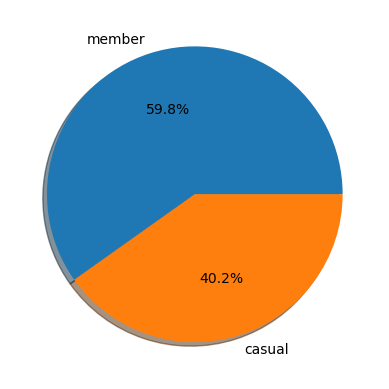

In [72]:
# check membership type and visualize

# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = bike_data['member_casual'].value_counts()

# labels for each section of the pie chart
labels=bike_data['member_casual'].value_counts().index

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)

# show the plot
plt.show()

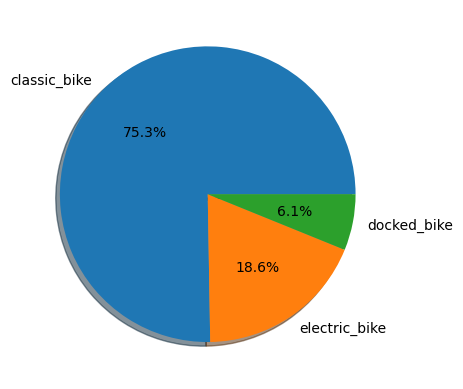

In [71]:
# check bike type and visualize

# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = bike_data['rideable_type'].value_counts()

# labels for each section of the pie chart
labels=bike_data['rideable_type'].value_counts().index

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)

# show the plot
plt.show()

In [70]:
bike_data.groupby(by=['member_casual', 'rideable_type'])['ride_id'].count()

/var/folders/n3/spvzfspj1gn51bldz75lhrt40000gn/T/ipykernel_71312/437404379.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_data.groupby(by=['member_casual', 'rideable_type'])['ride_id'].count()


member_casual  rideable_type
casual         classic_bike     2153320
               docked_bike       501957
               electric_bike     631203
member         classic_bike     4004289
               docked_bike            2
               electric_bike     889853
Name: ride_id, dtype: int64